In [1]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [4]:

# Generate random data for demonstration
np.random.seed(0)
num_samples = 100
square_footage = np.random.randint(1000, 3000, num_samples)
num_bedrooms = np.random.randint(2, 5, num_samples)
num_bathrooms = np.random.randint(1, 4, num_samples)
locations = np.random.choice(['Downtown', 'Suburb', 'Countryside'], num_samples)


In [3]:

# Generate random prices (for demonstration, the true coefficients are known)
true_coefficients = np.array([100, 200, 150, 50])
bias = 1000
prices = bias + true_coefficients[0] * square_footage + true_coefficients[1] * num_bedrooms + true_coefficients[2] * num_bathrooms + true_coefficients[3] * (locations == 'Downtown')


In [6]:

# Feature matrix X (including a bias term)
X = np.column_stack((square_footage, num_bedrooms, num_bathrooms, (locations == 'Downtown').astype(int)))

# Target variable (house prices)
y = prices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

# Create an SGDRegressor model with gradient descent optimization
model = SGDRegressor(loss="squared_error", max_iter=1000, learning_rate="constant", eta0=0.01)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [10]:

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.5796809824372437e+33


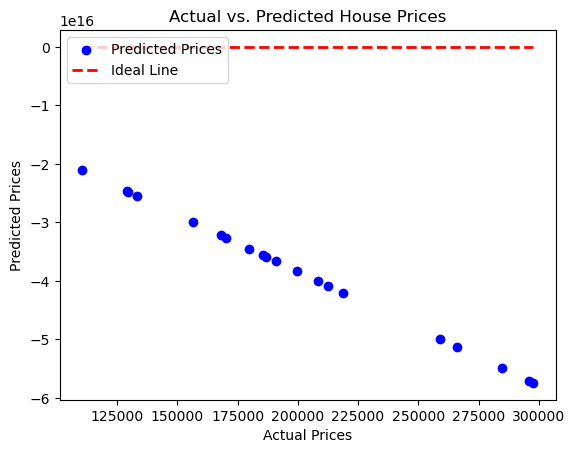

In [15]:

# Visualize the results
plt.scatter(y_test, y_pred, c='b', marker='o', label='Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.legend(loc='upper left')
plt.show()
